# Tugas 01 Data Mining
Kelompok 13 :
1. Ayu Kinasih Yuliawati (11180940000001)
2. Esti Choerunnisa (11180940000004)
3. Nanda Aprilia (11180940000012)
4. Melza Berliana (11180940000028)
5. Galih Shiddiq Zulfikar (11180940000055)

In [34]:
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.cm as cm
from collections import Counter

plt.style.use('bmh'); sns.set()


In [2]:
rumah = pd.read_csv('Documents/FOLDER KULIAHH/Metode Penelitian/Kelompok 13.csv')

print(rumah)

     No Tgl_Iklan                                                url  \
0     1  07-06-17  https://www.rumah123.com/properti/depok/hos290...   
1     2  06-01-21  https://www.rumah.com/listing-properti/dijual-...   
2     3  08-03-21  https://www.rumah123.com/properti/depok/hos770...   
3     4  10-03-21  https://www.rumah123.com/properti/depok/hos748...   
4     5  12-03-21  https://www.rumah123.com/properti/depok/hos516...   
5     6  17-03-21  https://www.rumah.com/listing-properti/dijual-...   
6     7  18-03-21  https://www.rumah123.com/properti/depok/hos804...   
7     8  18-03-21  https://www.rumah123.com/properti/depok/hos804...   
8     9  18-03-21  https://www.rumah123.com/properti/depok/hos791...   
9    10  18-03-21  https://www.rumah123.com/properti/depok/hos802...   
10   11  19-03-21            rumah123.com/properti/depok/hos6343024/   
11   12  19-03-21  https://www.rumah123.com/properti/depok/hos805...   
12   13  20-03-21  https://www.rumah123.com/properti/depok/hos79

In [3]:
#Tipe Data
print(type(rumah))
# ukuran data
N, P = rumah.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 100, ', Kolom = ', 18)

In [4]:
rumah.head()

,No,Tgl_Iklan,url,Harga_Juta,Kota,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi,Unnamed: 17
0,1,07-06-17,https://www.rumah123.com/properti/depok/hos290...,12000.0,DEPOK,975,800,6,5,1,1,2,1,11000,SHM,RUMAH CANTIK ASRI,"LOKASI SANGAT STRATEGIS DEKAT PONDOK INDAH, TO...",NaN
1,2,06-01-21,https://www.rumah.com/listing-properti/dijual-...,5500.0,DEPOK,482,300,4,4,0,0,4,0,2200,SHM,GRAND MATOA,"RUMAH DI GRAND MATOA, SIAP HUNI, BAGUS LOKASI ...",NaN
2,3,08-03-21,https://www.rumah123.com/properti/depok/hos770...,500.0,DEPOK,120,45,2,1,0,0,0,0,1300,SHM,RUMAH MURAH BISA KPR DEPELOVER CICILAN FLAT,RUMAH MURAH TERSEDIA TIPE 45/120 HARGA CASH 500JT,NaN
3,4,10-03-21,https://www.rumah123.com/properti/depok/hos748...,975.0,DEPOK,72,105,3,4,0,0,1,0,2200,SHM,"RUMAH CANTIK DAN ASRI JAMINAN DEKAT TOL, MALL,...",DIJUAL RUMAH 2 LANTAI DI LOKASI STRATEGIS DEKA...,NaN
4,5,12-03-21,https://www.rumah123.com/properti/depok/hos516...,645.0,DEPOK,70,42,2,1,0,0,0,0,1300,SHM,RUMAH SIAP HUNI DEPOK NUANSA BALI LOKASI PINGG...,RUMAH SIAP HUNI CANTIK BERNUANSA BALI,NaN


In [5]:
rumah.tail()

,No,Tgl_Iklan,url,Harga_Juta,Kota,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi,Unnamed: 17
95,96,07-04-21,https://www.rumah123.com/properti/depok/hos813...,900.0,DEPOK,112,55,3,2,0,0,1,0,2200,SHM,11 MENIT ALUN-ALUN DEPOK! RUMAH BARU DI CILODO...,"THE GREEN UBUD, RUMAH MEWAH DENGAN NUANSA BALI...",NaN
96,97,07-04-21,https://www.rumah123.com/properti/depok/hos813...,2900.0,DEPOK,216,300,4,3,2,1,1,1,2200,"PPJB,Girik,Adat",RUMAH SIAP HUNI DI CINERE DEPOK,"DATA : LT 216/LB 300, HADAP SELATAN, 2LANTAI, ...",NaN
97,98,07-04-21,https://www.rumah123.com/properti/depok/hos813...,1900.0,DEPOK,93,90,3,2,0,0,2,0,2200,SHM,RUMAH CANTIK 2 LANTAI DI RANGKAPAN JAYA-DEPOK,RUMAH CANTIK DALAM CLUSTER 2 LT DI RANGKAPAN J...,NaN
98,99,07-04-21,https://www.rumah123.com/properti/depok/hos813...,1500.0,DEPOK,110,220,4,4,0,0,2,0,2200,SHM,SISA 1 UNIT SAJA !! RUMAH 2 LANTAI TYPE 220/11...,"* SPESIFIKASI : L. TANAH : 110 M2, L. BANGUNAN...",NaN
99,100,10-04-21,https://www.rumah123.com/properti/depok/hos768...,700.2,DEPOK,74,65,3,2,0,0,1,0,2200,SHM,RUMAH MINIMALIS DEKAT TOL SAWANGAN 4,AKSES MERUPAKAN KEBUTUHAN UTAMA DLM AKTIFITAS ...,NaN


In [6]:
rumah.sample(10)

,No,Tgl_Iklan,url,Harga_Juta,Kota,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi,Unnamed: 17
87,88,07-04-21,rumah.com/listing-properti/dijual-duren-lantab...,1850.0,DEPOK,78,110,4,4,0,0,2,0,1300,SHM,DUREN LANTABUR RESIDENCE,RUMAH MEWAH HARGA MURAH DI LOKASI STRATEGIS DE...,NaN
72,73,06-04-21,https://www.rumah123.com/properti/depok/hos813...,3200.0,DEPOK,200,250,4,3,1,1,1,1,2200,SHM,"CINERE MEGA CINERE, SELANGKAH KE TOL BRIGIF","CINERE MEGA CINERE, SELANGKAH KE TOL BRIGIF",NaN
56,57,06-04-21,https://www.rumah123.com/properti/depok/hos812...,928.0,DEPOK,80,60,3,2,0,0,1,0,2200,SHM,"RUMAH ELIT DI MARGONDA DEPOK DEKAT TOL, STASIU...",TELAH HADIR PERUMAHAN DENGAN KONSEP KPR SYARIA...,NaN
85,86,07-04-21,https://www.rumah.com/listing-properti/dijual-...,707.4,DEPOK,78,45,2,1,0,0,1,0,1300,SHM,RUMAH PREMIUM SAMPING ALUN ALUN DEPOK DENGAN F...,DIJUAL RUMAH SPECIAL PROMO AKHIR TAHUN TAHUN B...,NaN
27,28,31-03-21,https://www.rumah123.com/properti/depok/hos808...,695.0,DEPOK,67,69,3,2,0,0,0,0,1300,SHM,RUMAH 2 LANTAI GAYA BALI GAS ALAM EKSKLUSIF DE...,"INFO: UNTUK RESPON LEBIH CEPAT, BISA HUBUNGI K...",NaN
23,24,30-03-21,https://www.rumah123.com/properti/depok/hos809...,320.0,DEPOK,40,60,2,1,0,0,0,0,1300,SHM,RUMAH MURAH DAN STRATEGIS DI TENGAH KOTA DEPOK,RUMAH MEWAH TERMURAH AKSES TERMUDAH HARGA MULA...,NaN
10,11,19-03-21,rumah123.com/properti/depok/hos6343024/,1250.0,DEPOK,84,114,3,0,1,1,0,0,2200,SHM,RUMAH CLUSTER MEWAH DAN LOKASI STRATEGIS DI PA...,LISTING INI MERUPAKAN VERIFIED LISTING 99 GROU...,NaN
64,65,06-04-21,https://www.rumah123.com/properti/depok/hos812...,674.9,DEPOK,75,50,2,1,0,0,1,0,1300,SHM,RUMAH SIAP HUNI BISA JALAN KAKI KE STASIUN DEP...,INI SATU LAGI PERSEMBAHAN DARI TRUST PROPERTY ...,NaN
21,22,29-03-21,https://www.rumah123.com/properti/depok/hos780...,548.0,DEPOK,60,54,3,2,3,2,0,0,2200,SHM,PROMO DP 0 FREE BIAYA RUMAH MURAH STRATEGIS 2 ...,HUNIAN CLUSTER PERUMAHAN TERBARU DI TENGAH DEP...,NaN
24,25,30-03-21,https://www.rumah123.com/properti/depok/hos752...,1290.0,DEPOK,99,90,3,2,0,0,1,0,2200,SHM,RUMAH TOWNHOUSE / CLUSTER MUSLIM DEKAT BANDARA...,RUMAH TOWNHOUSE MUSLIM MEWAH 2 LANTAI DEKAT BA...,NaN


In [7]:
#untuk melihat semua kolom nya
rumah.columns

Index(['No', 'Tgl_Iklan', 'url', 'Harga_Juta', 'Kota', 'LT', 'LB', 'KT', 'KM',
       'KTP', 'KMP', 'Carport', 'Garasi', 'Listrik', 'Surat', 'Judul',
       'Deskripsi', 'Unnamed: 17'],
      dtype='object')

In [8]:
#karena kolom No hanya untuk menomori data maka akan di remove
rumah.drop("No", axis=1, inplace=True)

In [9]:
#karena kolom Kota datanya seragam maka akan di remove
rumah.drop("Kota", axis=1, inplace=True)

In [10]:
rumah.drop("Unnamed: 17", axis=1, inplace=True)

In [11]:
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
Tgl_Iklan     100 non-null object
url           100 non-null object
Harga_Juta    100 non-null float64
LT            100 non-null int64
LB            100 non-null int64
KT            100 non-null int64
KM            100 non-null int64
KTP           100 non-null int64
KMP           100 non-null int64
Carport       100 non-null int64
Garasi        100 non-null int64
Listrik       100 non-null int64
Surat         100 non-null object
Judul         100 non-null object
Deskripsi     100 non-null object
dtypes: float64(1), int64(9), object(5)
memory usage: 11.8+ KB


In [12]:
rumah['Tgl_Iklan']=rumah['Tgl_Iklan'].astype('category')
rumah['url']=rumah['url'].astype('category')
rumah['Surat']=rumah['Surat'].astype('category')
rumah['Judul']=rumah['Judul'].astype('category')
rumah['Deskripsi']=rumah['Deskripsi'].astype('category')
rumah.dtypes

Tgl_Iklan     category
url           category
Harga_Juta     float64
LT               int64
LB               int64
KT               int64
KM               int64
KTP              int64
KMP              int64
Carport          int64
Garasi           int64
Listrik          int64
Surat         category
Judul         category
Deskripsi     category
dtype: object

In [13]:
#mengecek ada atau tidaknya duplikat data
print(rumah.shape)
rumah.duplicated().sum()

(100, 15)


0

oleh karena itu tidak ada duplikat data

In [14]:
#memilih variabel dengan tipe tertentu
rumah_num = rumah.select_dtypes(include=["float64", "int64"])
rumah_num.head() #sehingga rumah_num adalah variabel baru

,Harga_Juta,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik
0,12000.0,975,800,6,5,1,1,2,1,11000
1,5500.0,482,300,4,4,0,0,4,0,2200
2,500.0,120,45,2,1,0,0,0,0,1300
3,975.0,72,105,3,4,0,0,1,0,2200
4,645.0,70,42,2,1,0,0,0,0,1300


In [15]:
#memilih variabel dengan tipe tertentu
rumah_cat = rumah.select_dtypes(include=['category'])
rumah_cat.head()

,Tgl_Iklan,url,Surat,Judul,Deskripsi
0,07-06-17,https://www.rumah123.com/properti/depok/hos290...,SHM,RUMAH CANTIK ASRI,"LOKASI SANGAT STRATEGIS DEKAT PONDOK INDAH, TO..."
1,06-01-21,https://www.rumah.com/listing-properti/dijual-...,SHM,GRAND MATOA,"RUMAH DI GRAND MATOA, SIAP HUNI, BAGUS LOKASI ..."
2,08-03-21,https://www.rumah123.com/properti/depok/hos770...,SHM,RUMAH MURAH BISA KPR DEPELOVER CICILAN FLAT,RUMAH MURAH TERSEDIA TIPE 45/120 HARGA CASH 500JT
3,10-03-21,https://www.rumah123.com/properti/depok/hos748...,SHM,"RUMAH CANTIK DAN ASRI JAMINAN DEKAT TOL, MALL,...",DIJUAL RUMAH 2 LANTAI DI LOKASI STRATEGIS DEKA...
4,12-03-21,https://www.rumah123.com/properti/depok/hos516...,SHM,RUMAH SIAP HUNI DEPOK NUANSA BALI LOKASI PINGG...,RUMAH SIAP HUNI CANTIK BERNUANSA BALI


In [16]:
#Dasar pengolahan variable kategorik : Dummy Variable
df = pd.get_dummies(rumah["Surat"], prefix='surat')
df.head()

,surat_HGB,"surat_PPJB,Girik,Adat",surat_SHM
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [17]:
#menggabungkan dengan data awal (concat)
df2 = pd.concat([rumah, df], axis=1)
df2.head().transpose()

,0,1,2,3,4
Tgl_Iklan,07-06-17,06-01-21,08-03-21,10-03-21,12-03-21
url,https://www.rumah123.com/properti/depok/hos290...,https://www.rumah.com/listing-properti/dijual-...,https://www.rumah123.com/properti/depok/hos770...,https://www.rumah123.com/properti/depok/hos748...,https://www.rumah123.com/properti/depok/hos516...
Harga_Juta,12000,5500,500,975,645
LT,975,482,120,72,70
LB,800,300,45,105,42
KT,6,4,2,3,2
KM,5,4,1,4,1
KTP,1,0,0,0,0
KMP,1,0,0,0,0
Carport,2,4,0,1,0


In [18]:
# memilih data secara manual
x = rumah[['Harga_Juta','LT']]
x[:7]

,Harga_Juta,LT
0,12000.0,975
1,5500.0,482
2,500.0,120
3,975.0,72
4,645.0,70
5,1025.0,63
6,485.0,61


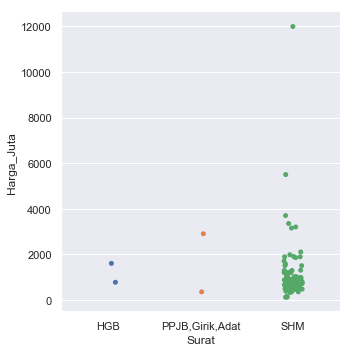

In [19]:
p = sns.catplot(x="Surat", y="Harga_Juta", data=rumah)

Berdasarkan plot diatas, terdapat 2 outlier

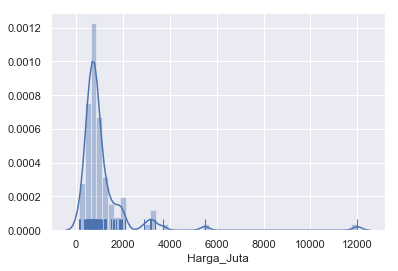

In [20]:
q = sns.distplot(rumah['Harga_Juta'], kde=True, rug=True)

In [21]:
#Misal dengan asumsi data berdistribusi normal 
#dan menggunakan confidence interval 95% disekitar variabel harga rumah
df = np.abs(rumah.Harga_Juta - rumah.Harga_Juta.mean())<=(2*rumah.Harga_Juta.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(100,)


0    False
1    False
2     True
3     True
4     True
Name: Harga_Juta, dtype: bool

# Menghilangkan Outlier

In [22]:
rumah2 = rumah[df] # Data tanpa outliers
print(rumah2.shape, rumah.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "rumah2"
# Jika datanya besar hati-hati melakukan hal ini

(98, 15) (100, 15)


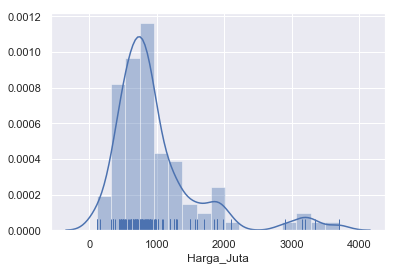

In [23]:
r = sns.distplot(rumah2['Harga_Juta'], kde=True, rug=True)

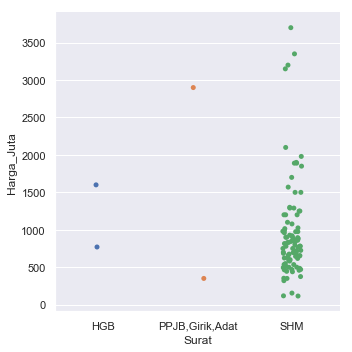

In [24]:
p = sns.catplot(x="Surat", y="Harga_Juta", data=rumah2)

# Melihat Missing Value

In [25]:
print(rumah2.isnull().sum())

Tgl_Iklan     0
url           0
Harga_Juta    0
LT            0
LB            0
KT            0
KM            0
KTP           0
KMP           0
Carport       0
Garasi        0
Listrik       0
Surat         0
Judul         0
Deskripsi     0
dtype: int64


dari output diatas terlihat bahwa tidak ada missing value disetiap variabel

In [26]:
set(rumah2['Surat'])

{'HGB', 'PPJB,Girik,Adat', 'SHM'}

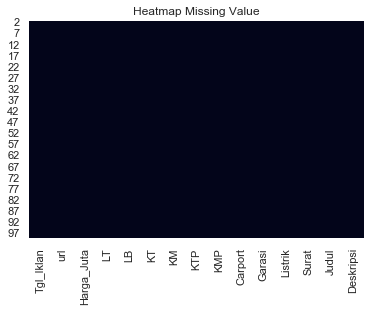

In [27]:
sns.heatmap(rumah2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

karena tidak terdapat missing value maka kosong

In [28]:
(rumah2.isnull().sum()/len(rumah2)).to_frame('persentase missing')

,persentase missing
Tgl_Iklan,0.0
url,0.0
Harga_Juta,0.0
LT,0.0
LB,0.0
KT,0.0
KM,0.0
KTP,0.0
KMP,0.0
Carport,0.0


# Statistika Deskriptif

In [29]:
rumah2.describe()

,Harga_Juta,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,984.929082,97.918367,88.367347,2.897959,2.051020,0.153061,0.102041,0.816327,0.153061,1964.285714
std,676.029741,64.058233,61.960810,1.439429,1.620567,0.483800,0.336440,0.841537,0.414978,1110.980806
min,114.900000,40.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,604.250000,70.000000,48.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1300.000000
50%,808.000000,78.000000,69.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000
75%,1094.500000,102.000000,100.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000
max,3700.000000,515.000000,380.000000,15.000000,15.000000,3.000000,2.000000,5.000000,2.000000,10000.000000


In [30]:
rumah2.describe(include='all')

,Tgl_Iklan,url,Harga_Juta,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi
count,98,98,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98,98,98
unique,20,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,96,87
top,06-04-21,https://www.rumah123.com/properti/depok/hos813...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHM,DUREN LANTABUR RESIDENCE,"INFO: UNTUK RESPON LEBIH CEPAT, BISA HUBUNGI K..."
freq,33,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,2,10
mean,NaN,NaN,984.929082,97.918367,88.367347,2.897959,2.051020,0.153061,0.102041,0.816327,0.153061,1964.285714,NaN,NaN,NaN
std,NaN,NaN,676.029741,64.058233,61.960810,1.439429,1.620567,0.483800,0.336440,0.841537,0.414978,1110.980806,NaN,NaN,NaN
min,NaN,NaN,114.900000,40.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,604.250000,70.000000,48.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,NaN,NaN,NaN
50%,NaN,NaN,808.000000,78.000000,69.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000,NaN,NaN,NaN
75%,NaN,NaN,1094.500000,102.000000,100.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000,NaN,NaN,NaN


In [31]:
CT = pd.crosstab(index=rumah2["Tgl_Iklan"], columns=rumah2["Surat"])
CT

Surat,HGB,"PPJB,Girik,Adat",SHM
Tgl_Iklan,,,
01-04-21,0,0,1
02-04-21,0,0,1
03-04-21,0,0,1
04-04-21,0,0,1
05-04-21,0,0,8
06-04-21,1,1,31
07-04-21,1,1,13
08-03-21,0,0,1
10-03-21,0,0,1


# Visualisasi Data

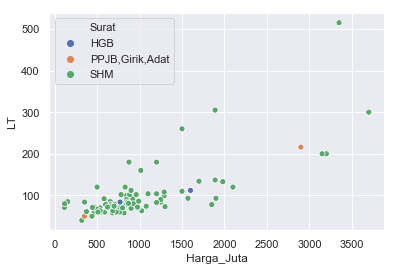

In [72]:
#Scatter Plot 
p = sns.scatterplot(x=rumah2['Harga_Juta'], y=rumah2['LT'], hue = rumah2['Surat'])

Berdasarkan output Scatter Plot diatas, terlihat titik-titik pola garis lurus dari kiri bawah ke kanan atas. Hal ini menunjukkan bahwa ada hubungan linear dan positif antara variabel Harga rumah (Harga_Juta) dengan variabel Luas Tanah (LT). Hubungan positif ini berarti jika semakin tinggi Harga Rumah(X) maka semakin besar juga Luas Tanah(Y) yang dijual.

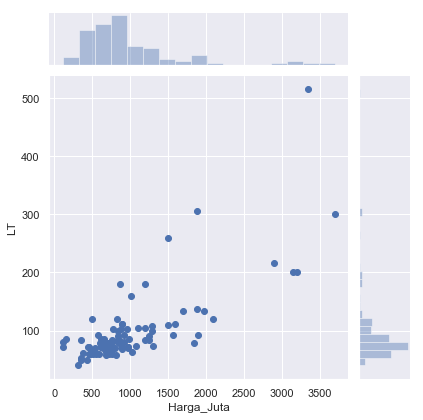

In [59]:
#Joint Plot Variabel Harga_Juta dengan variabel LT
p = sns.jointplot(x=rumah2['Harga_Juta'], y=rumah2['LT'])

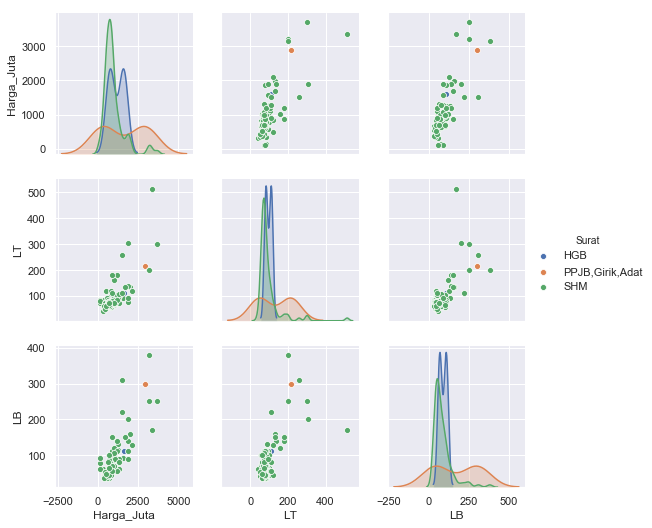

In [70]:
p = sns.pairplot(rumah2[['Harga_Juta','LT','LB','Surat']], hue="Surat")

# Memeriksa Korelasi

In [73]:
rumah2.corr()

,Harga_Juta,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik
Harga_Juta,1.000000,0.758460,0.804063,0.594369,0.557029,0.477541,0.387395,0.452709,0.354994,0.147883
LT,0.758460,1.000000,0.670213,0.371103,0.292703,0.381291,0.335714,0.461565,0.413113,0.223651
LB,0.804063,0.670213,1.000000,0.720320,0.700843,0.377438,0.289469,0.347110,0.217509,0.110763
KT,0.594369,0.371103,0.720320,1.000000,0.930346,0.126285,0.085586,0.248200,0.060934,-0.008104
KM,0.557029,0.292703,0.700843,0.930346,1.000000,0.068831,0.009261,0.248844,0.049587,-0.043068
KTP,0.477541,0.381291,0.377438,0.126285,0.068831,1.000000,0.853106,0.120406,0.241553,0.113849
KMP,0.387395,0.335714,0.289469,0.085586,0.009261,0.853106,1.000000,0.103292,0.182341,0.131208
Carport,0.452709,0.461565,0.347110,0.248200,0.248844,0.120406,0.103292,1.000000,0.199417,0.253143
Garasi,0.354994,0.413113,0.217509,0.060934,0.049587,0.241553,0.182341,0.199417,1.000000,0.076827
Listrik,0.147883,0.223651,0.110763,-0.008104,-0.043068,0.113849,0.131208,0.253143,0.076827,1.000000


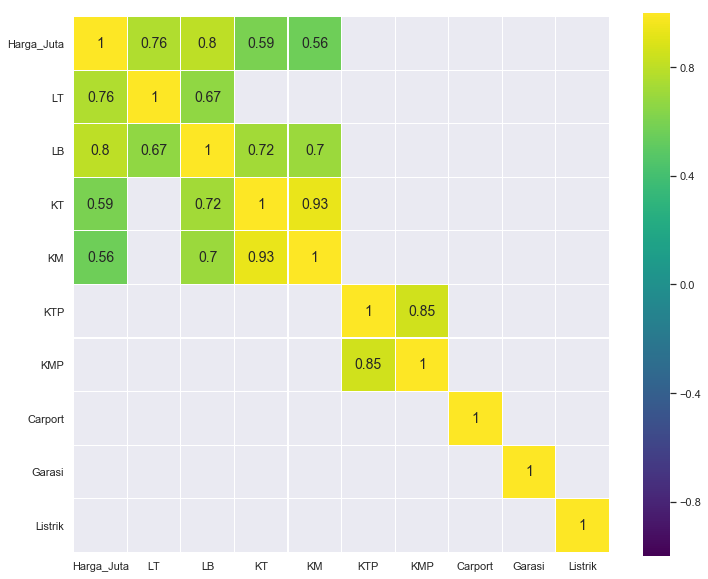

In [74]:
corr2 = rumah2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

# Kesimpulan

Dari 100 data iklan penjualan rumah di Kota Depok, ditemukan 2 data yang merupakan outlier, lalu kami me-remove outlier tersebut. Sehingga data yang diobservasi tersisa 98 data. Dari 98 data tersebut, tidak terdapat missing value. Untuk melihat keragaman data, kami melakukan Stastistika Deskriptif. Kami ingin mengetahui hubungan antara variabel antara 'Harga_juta' dan variabel 'Luas_Tanah' dengan melibatkan variabel 'Surat', berdasarkan hasil visualisasi dengan menggunakan scatterplot diperoleh kesimpulan titik-titik pola garis lurus dari kiri bawah ke kanan atas. Hal ini menunjukkan bahwa ada linear dan positif antara variabel Harga rumah (Harga_Juta) dengan variabel Luas Tanah (LT). Hubungan posistif ini berarti jika semakin tinggi Harga Rumah (x), maka semakin besar juga Luas Tanah (y) yang dijual, dan dari plot diatas rata-rata surat yang digunakan berupa Sertifikat Hak Milik (SHM). Berdasarkan tabel korelasi antarvariabel, diperoleh bahwa variabel 'Harga_juta' dengan 'LB' memiliki korelasi terbesar yaitu 0.8.

Untuk itu kami merekomendasikan untuk penjual rumah, yaitu:
Dikarenakan korelasi yang tinggi antara variabel 'Harga_juta' dengan 'LB', kami merekomendasikan untuk menjual rumah dengan harga yang lebih tinggi jika luas bangunan nya lebih besar.

In [92]:
# Run this cell ONLY if this notebook run from Google Colab
# Kalau dijalankan lokal (Anaconda/WinPython) maka silahkan install di terminal/command prompt 
# Lalu unduh secara manual file yang dibutuhkan dan letakkan di folder Python anda.
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

  Using cached https://files.pythonhosted.org/packages/73/b5/ee52615b3fd15d5302cf094005a1995cc37c67729094194de634f305a51c/numba-0.53.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/64/12/d2ab8618b3e68b7121de9ed743aee9b737777aa219586f71f3e11bb706aa/llvmlite-0.36.0-cp37-cp37m-win_amd64.whl
  Found existing installation: llvmlite 0.28.0


Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
'wget' is not recognized as an internal or external command,
operable program or batch file.


# Clustering Data

In [91]:
conda install numpy scipy
conda install scikit-learn
conda install numba
pip install umap-learn

SyntaxError: invalid syntax (<ipython-input-91-286f4fa6ea2c>, line 1)

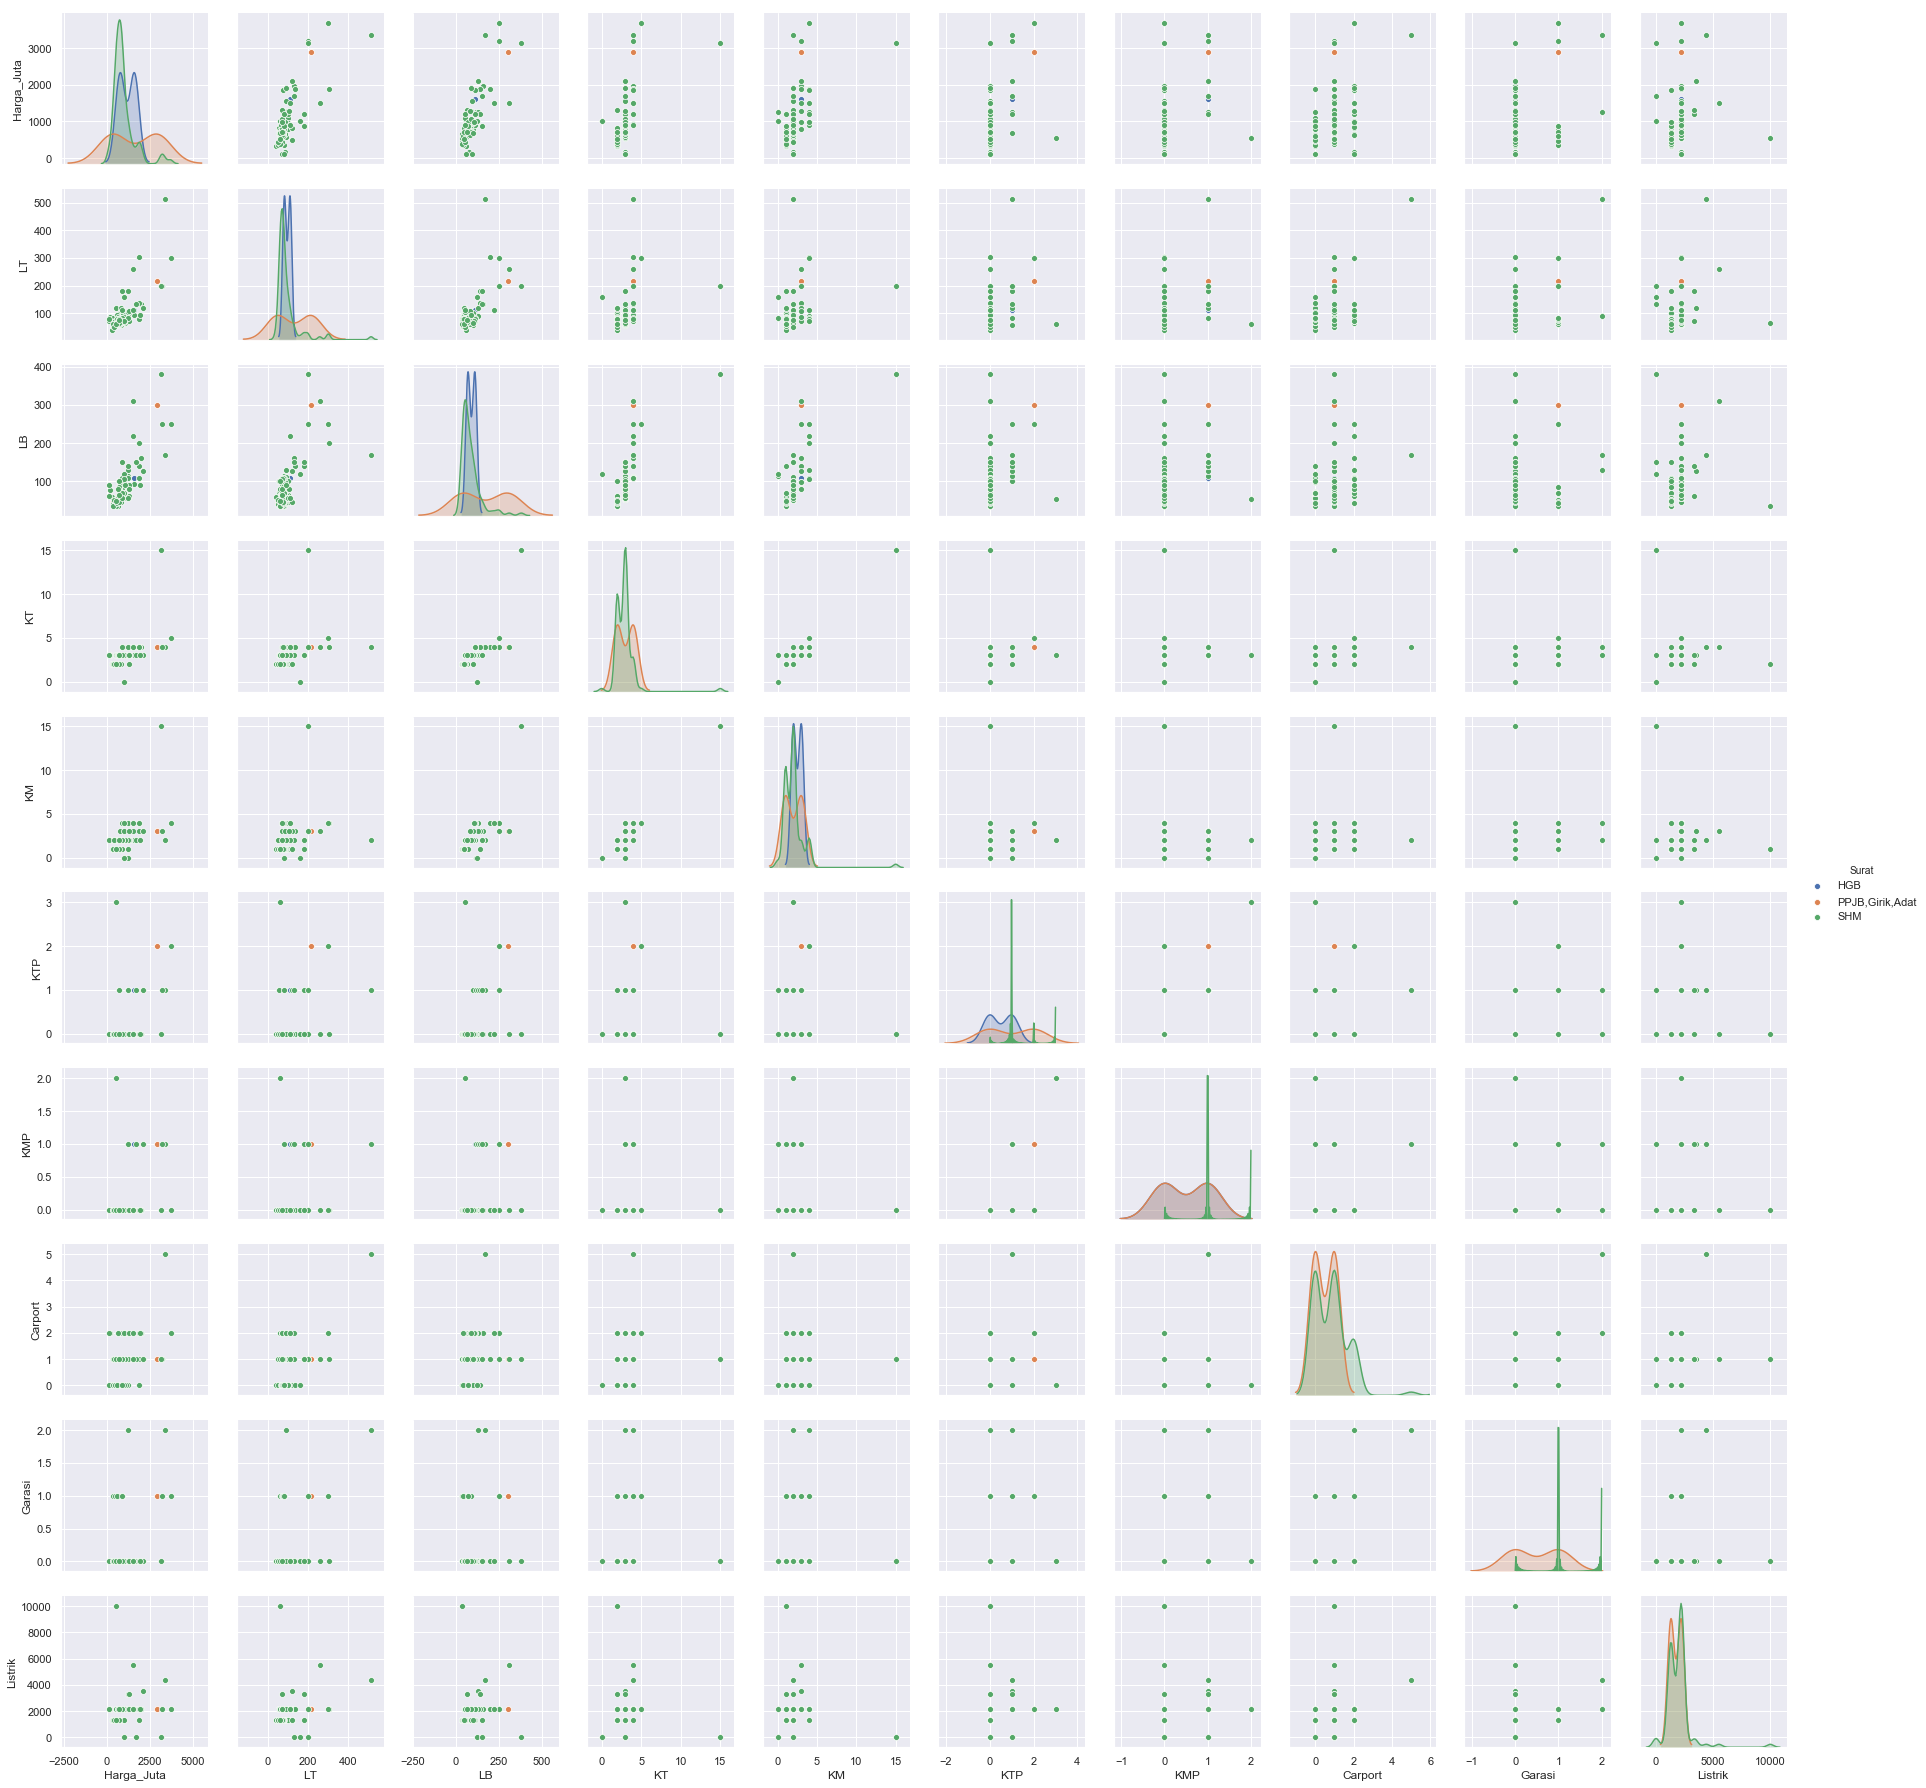

In [95]:
g = sns.pairplot(rumah2, hue="Surat")

In [97]:
rumah2.drop(['Tgl_Iklan','url','Judul','Deskripsi'], axis=1, inplace=True)
rumah2.head()

,Harga_Juta,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat
2,500.0,120,45,2,1,0,0,0,0,1300,SHM
3,975.0,72,105,3,4,0,0,1,0,2200,SHM
4,645.0,70,42,2,1,0,0,0,0,1300,SHM
5,1025.0,63,61,3,2,0,0,2,0,2200,SHM
6,485.0,61,45,2,1,0,0,0,0,1300,SHM


In [99]:
rumah2.iloc[:,:-1]

,Harga_Juta,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik
2,500.0,120,45,2,1,0,0,0,0,1300
3,975.0,72,105,3,4,0,0,1,0,2200
4,645.0,70,42,2,1,0,0,0,0,1300
5,1025.0,63,61,3,2,0,0,2,0,2200
6,485.0,61,45,2,1,0,0,0,0,1300
7,469.5,60,40,2,1,0,0,1,0,1300
8,680.0,58,100,2,2,1,0,1,0,2200
9,650.0,72,45,2,1,0,0,0,0,1300
10,1250.0,84,114,3,0,1,1,0,0,2200
11,154.2,85,77,3,2,0,0,2,0,2200


In [100]:
c_data = np.array(rumah2.iloc[:,:-1])
c_data[:5]

array([[5.000e+02, 1.200e+02, 4.500e+01, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+03],
       [9.750e+02, 7.200e+01, 1.050e+02, 3.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.200e+03],
       [6.450e+02, 7.000e+01, 4.200e+01, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+03],
       [1.025e+03, 6.300e+01, 6.100e+01, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 2.200e+03],
       [4.850e+02, 6.100e+01, 4.500e+01, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+03]])

In [103]:
# k-means: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# Hapus "random_state = random_state" jika ingin melihat efek randomized centroid.
k = 3
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
km.fit(c_data)
# Hasil clusteringnya
C_km = km.predict(c_data)
p= sns.countplot(C_km)

NameError: name 'cluster' is not defined